In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
ins = pd.read_csv('Insurance.csv')

In [119]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [120]:
ins.head()

#header of the data shows these columns

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [121]:
#add a column for yes / no if you have children
    #use the at() function
    #use for index, row

In [122]:
ins['has_children'] = ''
for i in ins:
    for index, row in ins.iterrows():
        if row['children'] > 0:
            ins.at[index,'has_children']='Y'
        else:
            ins.at[index,'has_children']='N'

#i['has_children'] = i

In [123]:
ins.head()

#we now have a column for whether or not you have children

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.92400,N
1,18,male,33.770,1,no,southeast,1725.55230,Y
2,28,male,33.000,3,no,southeast,4449.46200,Y
3,33,male,22.705,0,no,northwest,21984.47061,N
4,32,male,28.880,0,no,northwest,3866.85520,N


In [124]:
#what kinds of people should the company target to get the most result from the insurance

In [125]:
print(ins.groupby(by='has_children')['charges','bmi'].mean())
print('\n')
print(ins.groupby(by = 'sex')['charges','bmi'].mean())
print('\n')
print(ins.groupby(by='children').mean())
print('\n')
print(ins.groupby(by='children').count())
print('\n')
print(ins.groupby(by=['children','sex']).mean())
print('\n')
print(ins.groupby(by=['age']).mean())

                   charges        bmi
has_children                         
N             12365.975602  30.550296
Y             13949.941093  30.748370


             charges        bmi
sex                            
female  12569.578844  30.377749
male    13956.751178  30.943129


                age        bmi       charges
children                                    
0         38.444251  30.550296  12365.975602
1         39.453704  30.623148  12731.171832
2         39.445833  30.978104  15073.563734
3         41.566879  30.684331  15355.318367
4         39.000000  31.391200  13850.656311
5         35.611111  29.605000   8786.035247


          age  sex  bmi  smoker  region  charges  has_children
children                                                      
0         574  574  574     574     574      574           574
1         324  324  324     324     324      324           324
2         240  240  240     240     240      240           240
3         157  157  157     157     157

<ipython-input-125-883bfeee5eed>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(ins.groupby(by='has_children')['charges','bmi'].mean())
<ipython-input-125-883bfeee5eed>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(ins.groupby(by = 'sex')['charges','bmi'].mean())


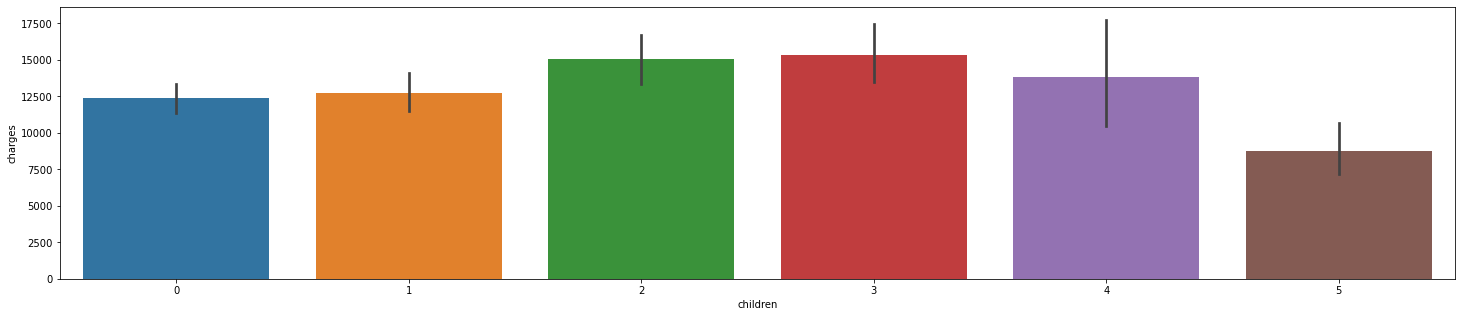

In [126]:
#barplot showing data grouped by children
insgrouped = ins
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x='children', y="charges", data=insgrouped, ax = ax)

#this barplot shows the mean of charges peaks for the group with three children

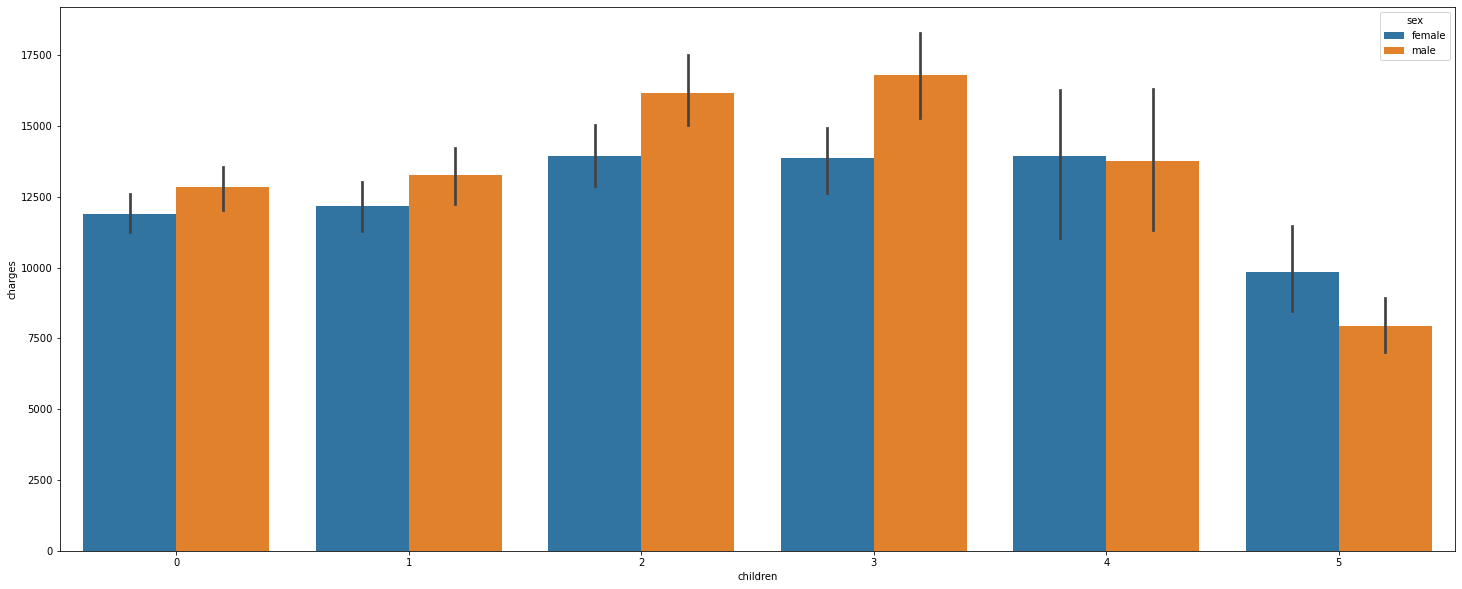

In [127]:
#barplot showing data grouped by ch
insgrouped = ins
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x='children', y="charges", hue = "sex", data=insgrouped, ax = ax, ci = 68)

#this barplot shows that men with three children have the highest mean charge, followed by men with two children

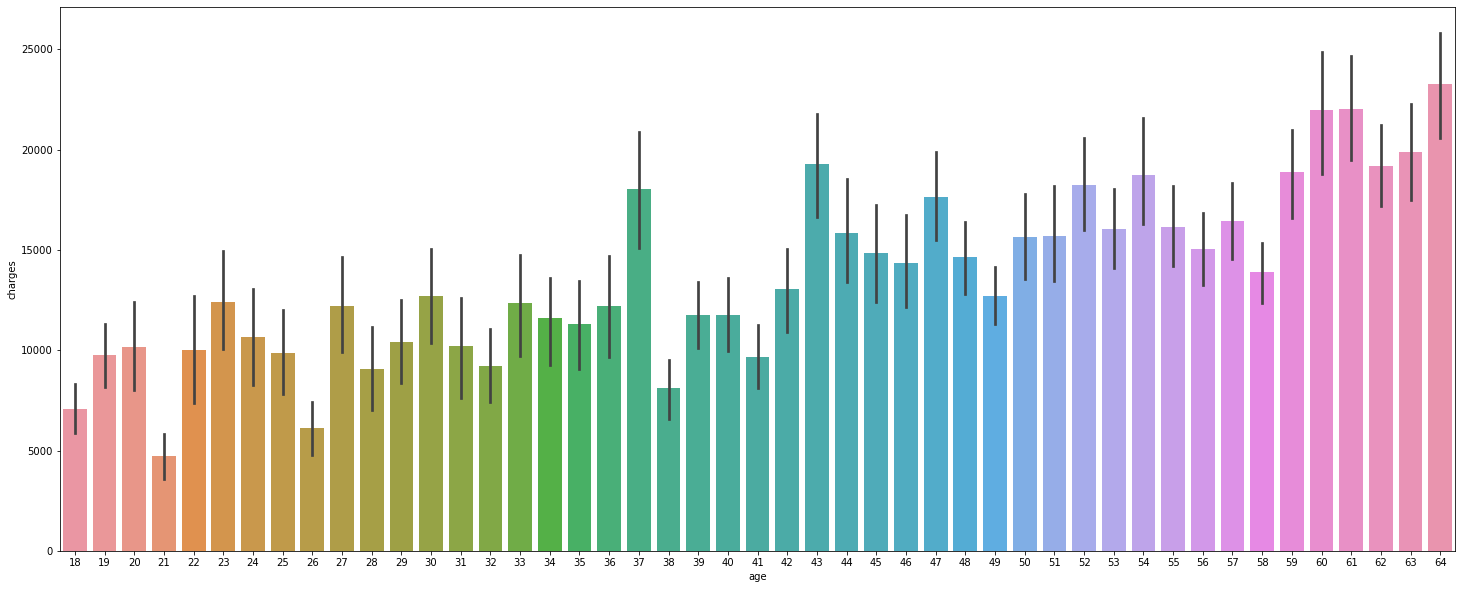

In [128]:
insgrouped = ins
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x='age', y="charges", data=insgrouped, ax = ax, ci = 68)

#this barplot shows the breakout by age of mean charges

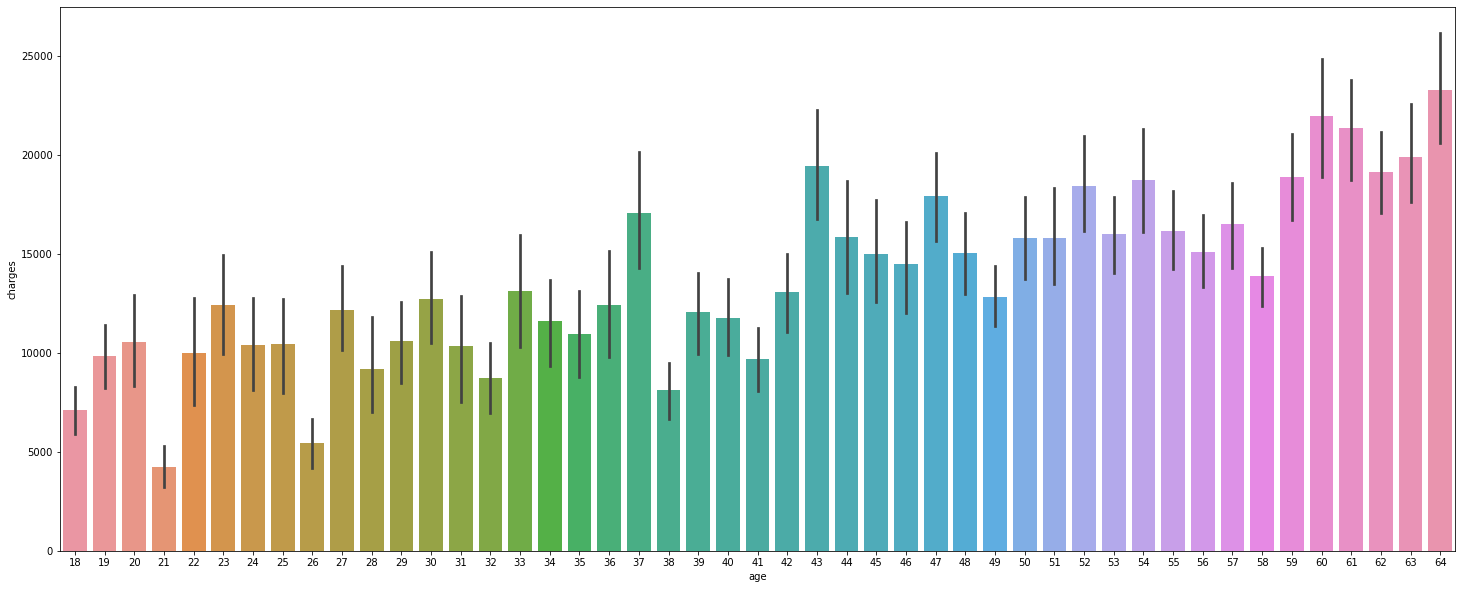

In [129]:
insgrouped = ins.loc[(ins['children']<=3) | (ins['children']==2)]
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x='age', y="charges", data=insgrouped, ax = ax, ci = 68)

#this is looking at the mean charges by age for all adults with either 2 or 3 children

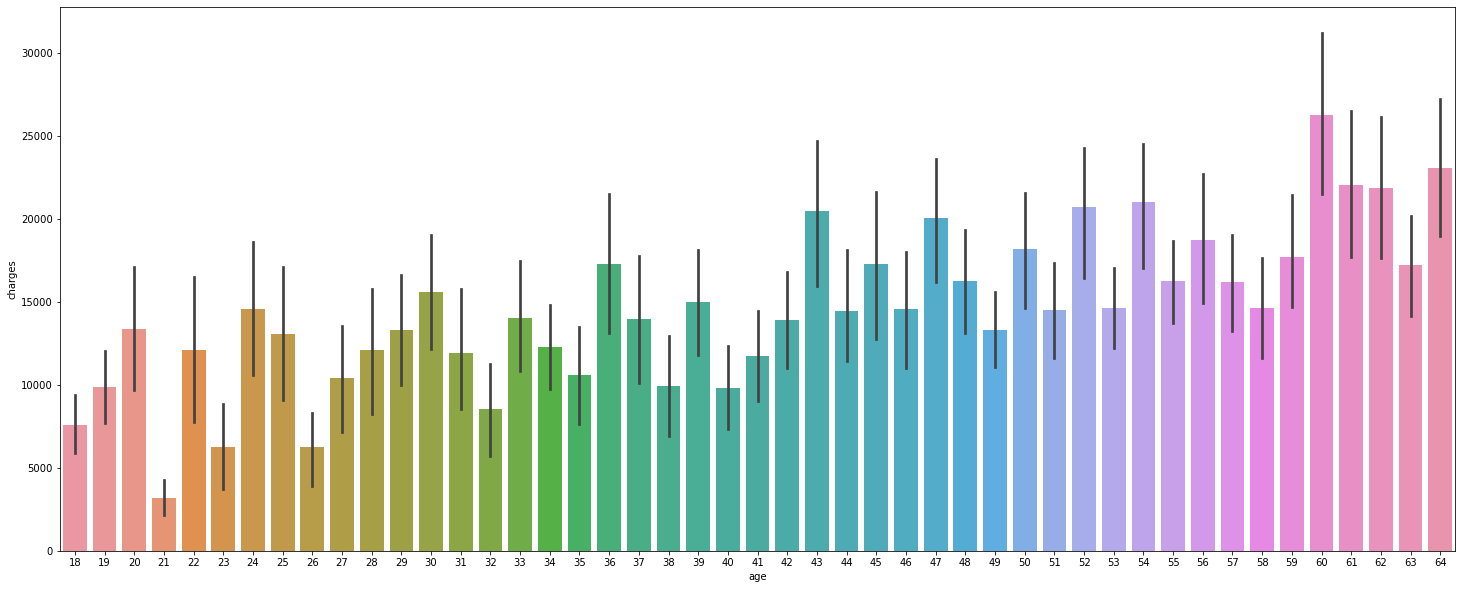

In [130]:
insgrouped = ins.loc[((ins['children']<=3) | (ins['children']==2)) & (ins['sex']=='male')]
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x='age', y="charges", data=insgrouped, ax = ax, ci = 68)

#this is looking at the mean charge for men with 2 or 3 children broken out by age
#seems above 40, we are getting higher charges, above 60 is highest charge

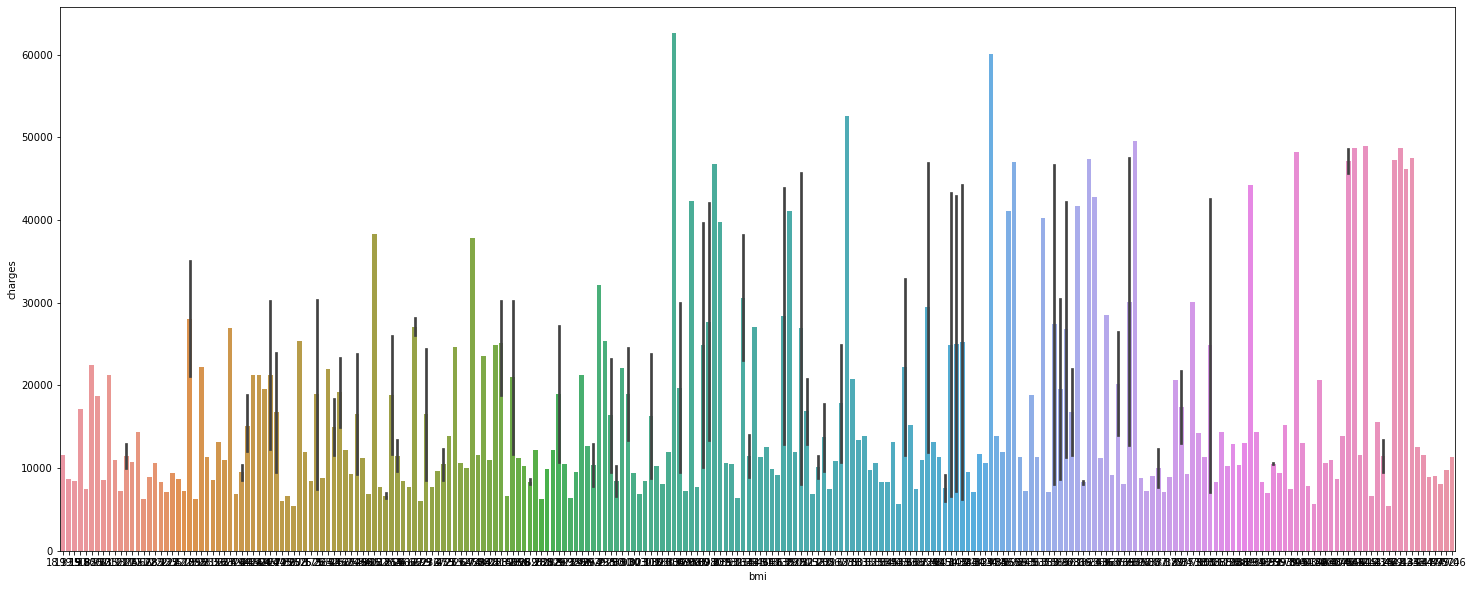

In [131]:
insgrouped = ins.loc[((ins['children']<=3) | (ins['children']==2)) & (ins['sex']=='male') & (ins['age']>=40)]
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x='bmi', y="charges", data=insgrouped, ax = ax, ci = 68)

#want to analyze by BMI, but BMI will need to be bucketed. Need to create new column in dataframe with bmi grouping
#intention was to filter data set to men over 40 with 2 or 3 kids and then cut by BMI, but couldn't

<AxesSubplot:xlabel='bmi', ylabel='Count'>

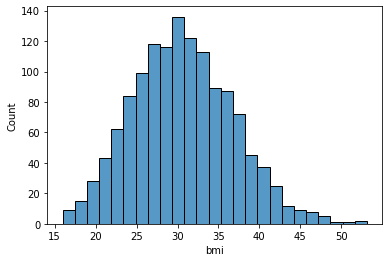

In [132]:
# lets create a histogram of bmi to understand the spread

sns.histplot(data=ins, x="bmi")

#lets create buckets of 5

In [146]:
ins['bmibin'] = ''
for i in ins:
    for index, row in ins.iterrows():
        if row['bmi'] < 20:
            ins.at[index,'bmibin']='0-20'
        elif 20 < row['bmi'] < 25:
            ins.at[index,'bmibin']='20-25'
        elif 25 < row['bmi'] < 30:
            ins.at[index,'bmibin']='25-30'
        elif 30 <= row['bmi'] < 35:
            ins.at[index,'bmibin']='30-35'
        elif 35 < row['bmi'] < 40:
            ins.at[index,'bmibin']='35-40'
        elif 40 < row['bmi']:
            ins.at[index,'bmibin']='40+'
        else:
            ins.at[index,'bmibin']=ins.at[index,'bmi']

#there was probably a smarter way to do this, but it will do for now

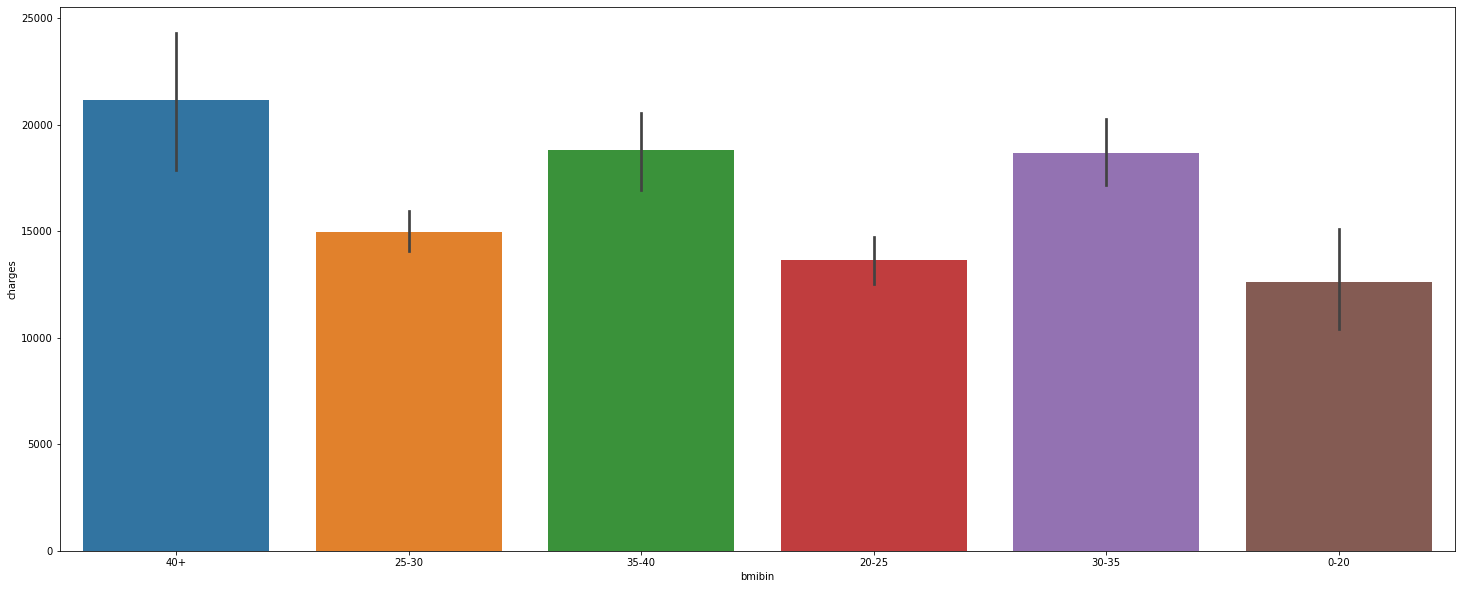

In [147]:
insgrouped = ins.loc[((ins['children']<=3) | (ins['children']==2)) & (ins['sex']=='male') & (ins['age']>=40)]
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(x='bmibin', y="charges", data=insgrouped, ax = ax, ci = 68)

#the sorting of this data is not helpful, but it shows some trend where with increasing bmi, you get increasing average cost